In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Covonutional_neural_network.modelUttils.loaddataset import load_dataset 
from Covonutional_neural_network.modelUttils.augment_dataset import apply_combined_noise, add_gaussian_noise, add_label_noise

In [2]:
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for label in range(18):
    sample = add_label_noise(np.zeros((28, 28)), label)
    axs[label//10][label%10].imshow(sample, cmap='gray')
    axs[label//10][label%10].set_title(str(label))
    axs[label//10][label%10].axis('off')
plt.tight_layout()
plt.show()


In [2]:
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for label in range(20):
    sample = apply_combined_noise(np.zeros((64, 64)))
    axs[label//10][label%10].imshow(sample, cmap='gray')
    axs[label//10][label%10].set_title(str(label))
    axs[label//10][label%10].axis('off')
plt.tight_layout()
plt.show()


In [9]:
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for label in range(20):
    sample = add_gaussian_noise(np.zeros((64, 64)), mean=0.0, std=0.002)
    axs[label//10][label%10].imshow(sample, cmap='gray')
    axs[label//10][label%10].set_title(str(label))
    axs[label//10][label%10].axis('off')
plt.tight_layout()
plt.show()


In [19]:
folder_paths = [
    # 'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\(',
    # 'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\)',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\0',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\1',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\2',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\3',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\4',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\5',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\6',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\7',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\8',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\9',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\add','C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\dec','C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\div',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\eq',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\mul',"C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\sub",
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\x',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\y',
    # 'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\z',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\+',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\x',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\dataset\\symbols\\÷',
]

In [2]:
folder_paths = [
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 0",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 1",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 2",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 3",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 4",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 5",
    "C:\\Users\\visha\\OneDrive\\Desktop\\new dataset\\char 6",
]

In [3]:
X, y = load_dataset(folder_path=folder_paths)

Loading Dataset .............
Shape of imags are: torch.Size([23151, 1, 64, 64])
Total images lodded: 23151


Label 0: 4056 number of images
Label 1: 3711 number of images
Label 2: 3445 number of images
Label 3: 2403 number of images
Label 4: 3432 number of images
Label 5: 3445 number of images
Label 6: 2659 number of images
Label 7: 0 number of images
Label 8: 0 number of images
Label 9: 0 number of images
Label 10: 0 number of images
Label 11: 0 number of images
Label 12: 0 number of images
Label 13: 0 number of images
Label 14: 0 number of images
Label 15: 0 number of images
Label 16: 0 number of images
Label 17: 0 number of images
Label 18: 0 number of images
Label 19: 0 number of images


Dataset loaded successfully!


In [5]:
label_to_index = {
    '0': 0,
    '1': 1, 
    '2': 2, 
    '3': 3, 
    '4': 4, 
    '5': 5, 
    '6': 6, 
    '7': 7, 
    '8': 8, 
    '9': 9, 
    'add': 10,
    'dec': 11, 
    'div': 12, 
    'eq': 13, 
    'mul': 14,
    'sub': 15,
    '(': 16, 
    ')': 17, 
    'x': 18,  
    'y': 19, 
    'z': 20,
}

In [4]:
X.shape

torch.Size([23151, 1, 64, 64])

In [5]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [7]:
X = X.reshape(-1, 64*64)

In [9]:
ind = np.random.randint(0, X.shape[0]-1)
plt.imshow(X[ind].reshape(64, 64), cmap='gray')
plt.title(f"Label: {y[ind]}")

Text(0.5, 1.0, 'Label: 3')

In [10]:
import umap.umap_ as umap
umap_model = umap.UMAP(n_components=64*64)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab20', s=2)
plt.title("UMAP Projection of Noisy Data")
plt.colorbar()
plt.tight_layout()
plt.show()

c:\Users\visha\OneDrive\Desktop\MathAI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\visha\OneDrive\Desktop\MathAI\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [11]:
# Define a bounding box for the central region (adjust as needed)
x_min, x_max = 4, 10  # X-axis range for the central cluster
y_min, y_max = 2, 6   # Y-axis range for the central cluster

# Filter points in the central region
central_region = (X_umap[:, 0] >= x_min) & (X_umap[:, 0] <= x_max) & \
                 (X_umap[:, 1] >= y_min) & (X_umap[:, 1] <= y_max)

# Get the unique classes in the central region
overlapping_classes = np.unique(y[central_region])

print(f"Classes in the overlapping region: {overlapping_classes}")
print(f"Number of overlapping classes: {len(overlapping_classes)}")

Classes in the overlapping region: [0 1 2 3 4 5 6]
Number of overlapping classes: 7


In [17]:
label_to_index = {
    '0': 0,
    '1': 1, 
    '2': 2, 
    '3': 3, 
    '4': 4, 
    '5': 5, 
    '6': 6, 
    '7': 7, 
    '8': 8, 
    '9': 9, 
    'add': 10,
    'dec': 11, 
    'div': 12, 
    'eq': 13, 
    'mul': 14,
    'sub': 15,
    '(': 16, 
    ')': 17, 
    'x': 18,  
    'y': 19, 
    'z': 20,
}

In [12]:
X -= X.mean(axis=0)
cov = X.T@X / X.shape[0]

In [13]:
plt.imshow(cov,cmap='gray')
plt.title('Covariance Matrix')
plt.axis('off')
plt.show()

In [14]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
sorted_eigenvalues = np.argsort(eigenvalues)[::-1]

In [15]:
rule = np.cumsum(sorted_eigenvalues)/np.sum(sorted_eigenvalues)
rule = rule[rule>0.95]
rule

array([0.95012484, 0.95054039, 0.95095582, 0.95137112, 0.95178631,
       0.95220138, 0.95261633, 0.95303116, 0.95344587, 0.95386046,
       0.95427494, 0.95468929, 0.95510352, 0.95551764, 0.95593163,
       0.95634539, 0.95675927, 0.95717291, 0.95758642, 0.95799982,
       0.95841275, 0.95882579, 0.95923895, 0.95965223, 0.96006503,
       0.96047772, 0.96089028, 0.96130273, 0.96171505, 0.96212726,
       0.96253935, 0.96295132, 0.96336317, 0.9637749 , 0.96418651,
       0.964598  , 0.96500937, 0.96542063, 0.96583176, 0.96624277,
       0.96665367, 0.96706445, 0.9674751 , 0.96788564, 0.96829606,
       0.96870636, 0.96911654, 0.9695266 , 0.96993654, 0.97034636,
       0.97075607, 0.97116565, 0.97157512, 0.97198446, 0.97239369,
       0.97279922, 0.97320451, 0.97360968, 0.97401473, 0.97441967,
       0.97482388, 0.97522798, 0.97563173, 0.97603308, 0.97643432,
       0.97683544, 0.97723644, 0.97763731, 0.97803808, 0.97843872,
       0.97883912, 0.9792394 , 0.97963921, 0.9800389 , 0.98043

In [18]:
W = eigenvectors[:, :len(eigenvectors) - len(rule)]
# W = eigenvectors
W.shape

torch.Size([4096, 3971])

In [24]:
new_X = W.T @ X.T

RuntimeError: expected m1 and m2 to have the same dtype, but got: struct c10::complex<float> != float

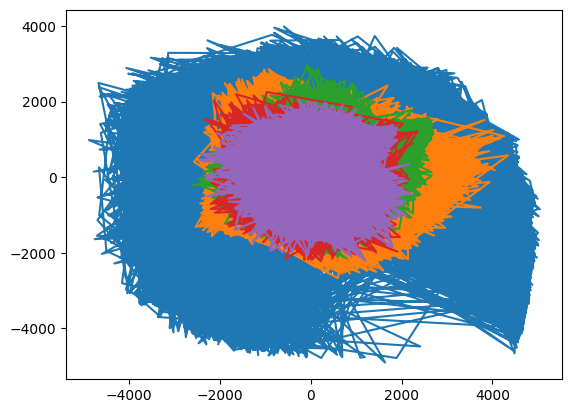

In [ ]:
plt.plot(new_X[0], new_X[1], new_X[2], new_X[3], new_X[4], new_X[5], new_X[6], new_X[7], new_X[8], new_X[9])
